# Importing Data

This dataset includes samples of 2 types of wine (White/Red). Each sample is described by 12 columns.
According to **oenology** theory, the values of each column should be:
1. Type
2. Fixed Acidity
3. Volatile Acidity
4. Citric Acid
5. Residual Sugar
6. Free Sulfur Dioxide
7. Total Sulfur Dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol
12. Quality

The goal of this work is to analyze the correlation between the **physicochemical** features
of the wine samples and their respective quality.

In [164]:
import pandas as pd

samples = pd.read_csv('wines.csv')
samples

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Imputing Missing Values

There is a small number of `nan` values, which however can be imputed effectively using the
KNN imputation method.

In [165]:
from sklearn.impute import KNNImputer

missing_values = samples.isna().sum().sum()
samples['type'] = samples['type'].replace({'white': 0, 'red': 1}).astype(int)
samples[:] = KNNImputer(n_neighbors=25, weights='distance').fit_transform(samples)
samples['type'] = samples['type'].replace({0: 'white', 1: 'red'})

f'Imputed {missing_values} missing values.'

'Imputed 38 missing values.'

# Wine Type & Quality Distribution

Text(0.5, 1.0, 'Wine Types')

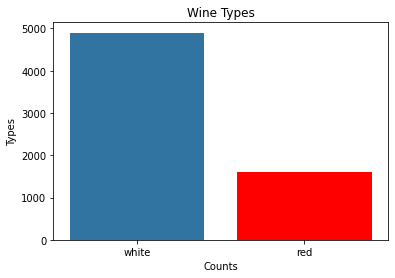

In [166]:
import seaborn as sns

type_counts = samples['type'].value_counts()
ax = sns.barplot(x=type_counts.index, y=type_counts.values)
ax.patches[1].set_color('red')
ax.set_xlabel('Counts')
ax.set_ylabel('Types')
ax.set_title('Wine Types')

Text(0.5, 1.0, 'Red Wine Quality Range')

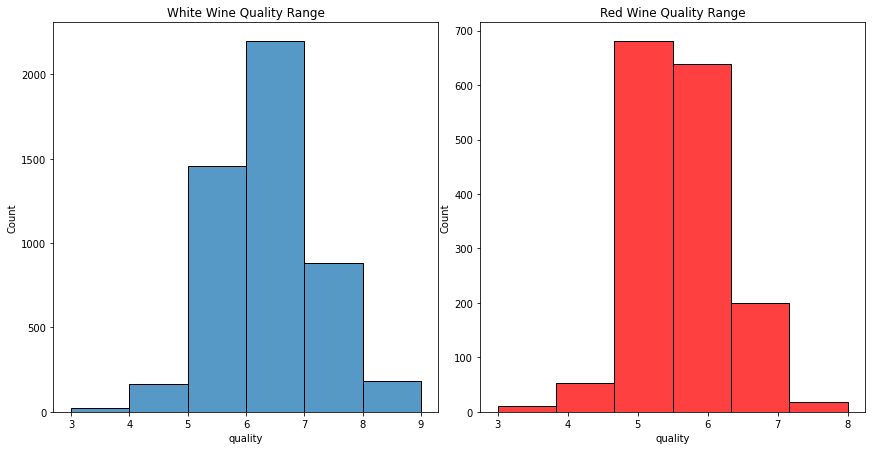

In [167]:
import matplotlib.pyplot as plt


white_wines = samples.loc[samples['type'] == 'white']
red_wines = samples.loc[samples['type'] == 'red']

fig, axs = plt.subplots(1,2, figsize=(12, 6))
fig.tight_layout()

ax = sns.histplot(white_wines, x='quality', bins=6, ax=axs[0])
ax.set_title('White Wine Quality Range')
ax = sns.histplot(red_wines, x='quality', bins=6, ax=axs[1], color='red')
ax.set_title('Red Wine Quality Range')

From the 2 histograms above, as well as the wine type barplots we can conclude 2 things:
1. This is an imbalanced dataset. There number of white wine samples are 2 times more than the red ones
2. The quality distribution of white wine is similar to the red one. This could indicate that the wine type does not affect the wine quality

# Feature Description

In [168]:
samples['type'] = samples['type'].replace({'white': 0, 'red': 1}).astype(int)
samples.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
type,6497.0,0.246114,0.430779,0.00000,0.00000,0.00000,0.00000,1.00000
fixed acidity,6497.0,7.216469,1.295985,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339630,0.164569,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318689,0.145245,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443859,4.757552,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056035,0.035033,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218414,0.160669,2.72000,3.11000,3.21000,3.32000,4.01000


# Linear Correlation Analysis

<AxesSubplot:>

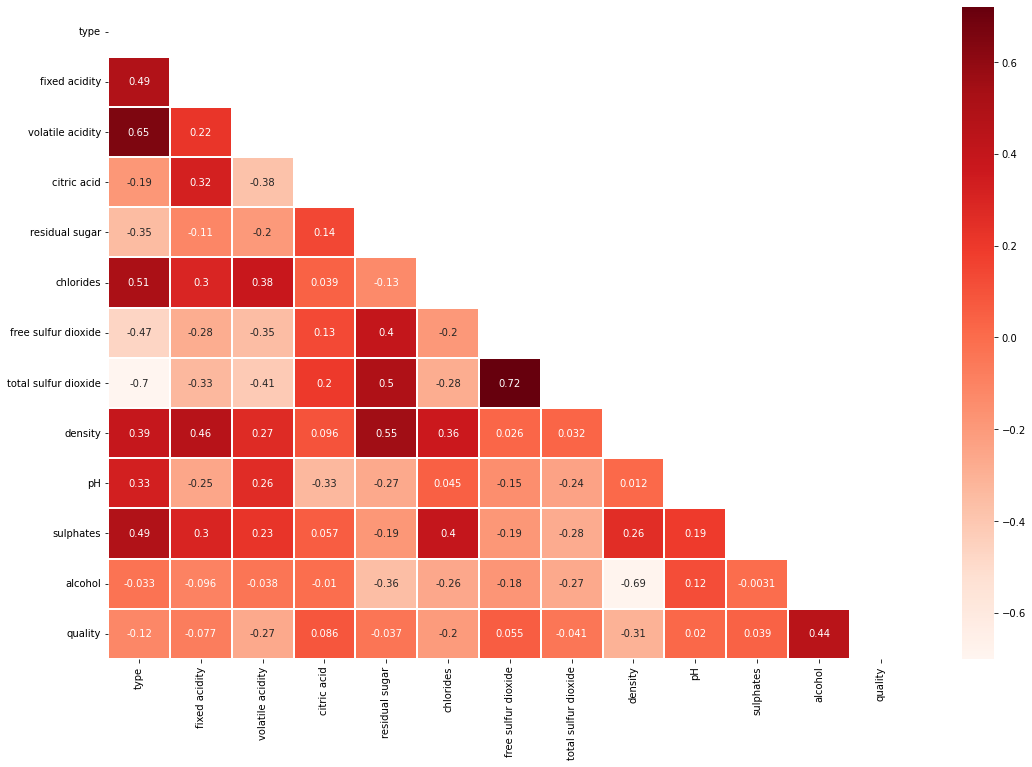

In [169]:
import numpy as np

corr = samples.corr()
corr_mask = np.triu(np.ones_like(corr, dtype=bool))

fig, _ = plt.subplots(1, 1, figsize=(18, 12))
sns.heatmap(samples.corr(), annot=True, cmap='Reds', linecolor='w', linewidth=2, mask=corr_mask)

Ideally, a **high-quality feature should have 0.0 correlation** score with the rest of the inputs.
Features with **correlation close to 1.0 or -1.0 are highly correlated** and should be removed.

In this analysis, we notice that the total sulfur dioxide is highly correlated with the free sulfur dioxide.
According to the oenology theory *Total Sulfur Dioxide = Free Sulfur Dioxide + Sulfur Bound to Other Chemicals*.
Perhaps a **new feature should be created and replace the total sulfur dioxide** that describes the sulfur bound
to other chemicals.

<AxesSubplot:>

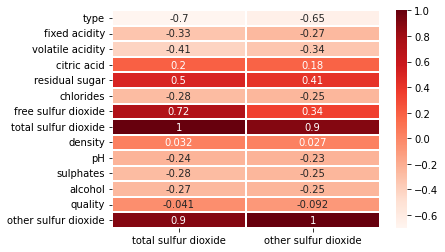

In [173]:
samples['other sulfur dioxide'] = samples['total sulfur dioxide'] - samples['free sulfur dioxide']
corr = samples.corr()[['total sulfur dioxide', 'other sulfur dioxide']]
sns.heatmap(corr, annot=True, cmap='Reds', linecolor='w', linewidth=2)

Overall, the `other sulfur dioxide` has lower correlation scores with the rest of the features

# Variance Analysis

<AxesSubplot:>

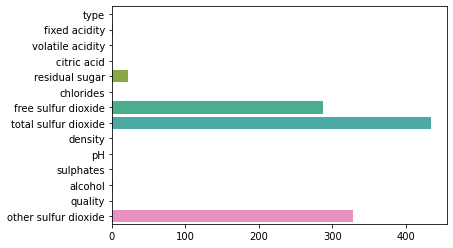

In [171]:
from sklearn.feature_selection import VarianceThreshold

variance_analyzer = VarianceThreshold()
variance_analyzer.fit(samples)

sns.barplot(x=variance_analyzer.variances_, y=samples.columns)

| Column               | Variance |
|----------------------|----------|
| Type                 | 0.1855   |
| Fixed Acidity        | 1.6793   |
| Volatile Acidity     | 0.0270   |
| Citric Acid          | 0.0210   |
| Residual Sugar       | 22.630   |
| Chlorides            | 0.0012   |
| Free Sulfur Dioxide  | 288.00   |
| Total Sulfur Dioxide | 434.00   |
| Density              | 0.0000   |
| Sulfites             | 0.0221   |
| Alcohol              | 1.4223   |
| Quality              | 0.7624   |

**Low variance** features contain little to **no useful information**.
On the other hand, it might be **hard to extract** information from features with **high variance**.
In this particular analysis we can conclude that:

* The `Density` feature has very low variance and by removing this feature it could potentially improve the model's accuracy.
* The `Residual Sugar, Free Sulfur Dioxide & Total Sulfur Dioxide` should be scaled, in order to drop the variance to normal levels.

<AxesSubplot:>

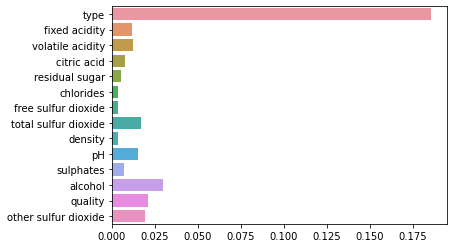

In [172]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
samples[:] = scaler.fit_transform(samples)

variance_analyzer = VarianceThreshold()
variance_analyzer.fit(samples)

sns.barplot(x=variance_analyzer.variances_, y=samples.columns)